In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='train')

In [2]:
X, y = data.data, data.target

In [3]:
def clean_head_foot(docs):
    '''
    Remove header lines except 'Subject' and 'Organization'
    '''
    clean_docs = []
    for doc in docs:
        head, split, tail = doc.partition('\n\n')

        # clean head
        clean_head = '\n'.join([line.strip().split(':')[-1]
                                for line in head.strip().split('\n')
                                if line.strip().split(':')[0]
                                in ('Subject', 'Organization')])

        # remove foot
        splited_tail = tail.strip().split('\n')
        for i in range(len(splited_tail) - 1, -1, -1):
            if splited_tail[i] == '' or \
                    splited_tail[i].strip('-') == '' or \
                    splited_tail[i].strip('=') == '' or \
                    splited_tail[i].strip('#') == '' or \
                    splited_tail[i].strip('*') == '' or \
                    splited_tail[i].strip('\n') == '':
                break
        clean_tail = '\n'.join(splited_tail[:i])

        clean_doc = clean_head + '\n' + clean_tail
        clean_docs.append(clean_doc)

    return clean_docs

In [4]:
import pandas as pd

clean_X = clean_head_foot(X)
split_X = [doc.strip().split('\n') for doc in clean_X]
num_lines = [len(lst) for lst in split_X]

df = pd.DataFrame({'Category': y, '# of lines': num_lines})
df = df.groupby('Category').agg({'Category': 'count', '# of lines': 'mean'})
df.head()

,Category,# of lines
Category,,
0,480,40.637500
1,584,30.595890
2,591,23.879865
3,590,23.969492
4,578,20.636678


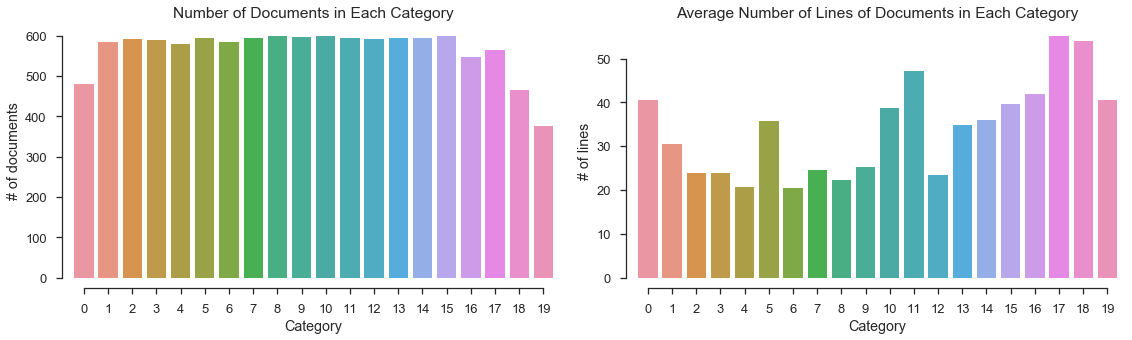

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', context='talk')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x=df.index, y='Category', data=df, ax=ax1)
ax1.set_ylabel('# of documents')
ax1.set_title('Number of Documents in Each Category')
sns.barplot(x=df.index, y='# of lines', data=df, ax=ax2)
ax2.set_title('Average Number of Lines of Documents in Each Category')
sns.despine(bottom=True)
# plt.setp(fig.axes, yticks=[])
sns.despine(offset=10, trim=True)
plt.tight_layout(h_pad=3)
plt.show()